In [1]:
import numpy as np
import pandas as pd
import pyarrow as pa
import joblib
import dask.dataframe as dd
df = dd.read_parquet("gcs://ds352-data/regression-1").compute()

In [22]:
data = df.groupby(['Crash Year']).sum()
data.to_csv("Regression-grouped.csv")
data

,Fatality Count,Injury Count,Person Count,Total Unit Count,Bicycle Count
Crash Year,,,,,
1997,31,4330,10374,8083,2489
1998,36,4577,10684,8613,2748
1999,43,4025,9812,7876,2385
2000,29,3984,9658,7847,2319
2001,33,2604,6546,5194,1301
2002,30,3015,7611,5990,1563
2003,32,2968,7856,6118,1575
2004,36,3021,7828,6217,1631
2005,41,2643,7023,5616,1404


In [12]:
from sklearn.linear_model import LinearRegression
data2 = data['Bicycle Count']
y = data.index.values.reshape(-1, 1)
X = data['Bicycle Count'].values.reshape(-1, 1)
# X = np.array(data2)
# y = data2
# y = 1 * x_0 + 2 * x_1 + 3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
regressor = LinearRegression().fit(X, y)
regressor.score(X, y)

print(regressor.intercept_)

print(regressor.coef_)
y_pred = regressor.predict(X_test)

# df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
# df_preds.head()
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

[2023.74964085]
[[-0.01053184]]
Mean absolute error: 2.59
Mean squared error: 10.06
Root mean squared error: 3.17


TypeError: Object with dtype category cannot perform the numpy op multiply

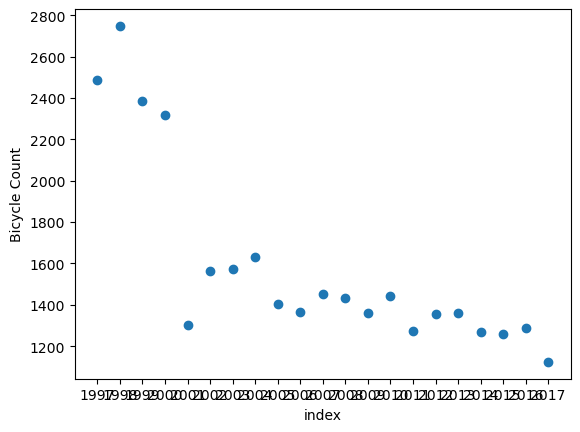

In [20]:
import matplotlib.pyplot as plt

plt.scatter(data.index, data['Bicycle Count'])
plt.xlabel("index")
plt.ylabel("Bicycle Count")
plt.plot(data.index, regressor.coef_*data.index+regressor.intercept_)
plt.show()